## Load admissions table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import string
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
path = 'cleaned_data/'
df_train = pd.read_csv(path + 'df_train.csv', header=0, sep=',', quotechar='"')
df_valid = pd.read_csv(path + 'df_valid.csv', header=0, sep=',', quotechar='"')
df_test = pd.read_csv(path + 'df_test.csv', header=0, sep=',', quotechar='"')

In [3]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

my_new_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also','should','if','it','been','who','during', 'd', 'c', 'f']

In [4]:

vect = CountVectorizer(lowercase = True, max_features = 2000, tokenizer = tokenizer_better,stop_words =my_new_stop_words)
#
# This could take a while
vect.fit(df_train.TEXT.values)

X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

In [5]:
X_test_tf = vect.transform(df_test.TEXT.values)
y_test = df_test.OUTPUT_LABEL

# Step 3: Build a model

## Xgboost

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBClassifier
from sklearn import metrics

In [12]:
clf = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
booster = 'gbtree',
eta = 0.05,
objective = 'binary:logistic',
nthread = 4,
colsample_bytree= 0.5326780859210172, 
gamma= 0.6499055536075732, 
max_delta_step= 9.67653592799797, 
max_depth= 5, 
min_child_weight= 19.419063672362732, 
reg_lambda= 0.9730525337026057, 
subsample= 0.9198065096810114,
n_estimators=1000, #树的个数
seed=1000 #随机种子
)

In [13]:
#设置验证集合 verbose=False不打印过程
clf.fit(X_train_tf, y_train,eval_set=[(X_train_tf, y_train), (X_valid_tf, y_valid)],
        eval_metric='auc',early_stopping_rounds=100 ,verbose=True)

[01:30:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=5
[0]	validation_0-auc:0.700197	validation_1-auc:0.637803
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[01:30:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-auc:0.730688	validation_1-auc:0.668423
[01:30:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-auc:0.745031	validation_1-auc:0.677531
[01:30:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-auc:0.754674	validation_1-auc:0.687462
[01:30:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[4]	validation_0-auc:0.758813	validation_1-auc:0.68916
[01

[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[48]	validation_0-auc:0.877664	validation_1-auc:0.721794
[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[49]	validation_0-auc:0.878733	validation_1-auc:0.722597
[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[50]	validation_0-auc:0.880338	validation_1-auc:0.723591
[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[51]	validation_0-auc:0.88097	validation_1-auc:0.723856
[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[52]	validation_0-auc:0.883268	validation_1-auc:0.723495
[01:30:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[53]	validation_0-auc:0.884544	validation_1-

[01:30:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=5
[97]	validation_0-auc:0.938922	validation_1-auc:0.719537
[01:30:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[98]	validation_0-auc:0.939624	validation_1-auc:0.7195
[01:30:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[99]	validation_0-auc:0.940287	validation_1-auc:0.7189
[01:30:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[100]	validation_0-auc:0.941104	validation_1-auc:0.718896
[01:30:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[101]	validation_0-auc:0.941504	validation_1-auc:0.719179
[01:30:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[102]	validation_0-auc:0.942234	validation_1-

[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[146]	validation_0-auc:0.966651	validation_1-auc:0.715851
[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[147]	validation_0-auc:0.967311	validation_1-auc:0.715517
[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[148]	validation_0-auc:0.967843	validation_1-auc:0.71564
[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[149]	validation_0-auc:0.96834	validation_1-auc:0.715071
[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[150]	validation_0-auc:0.968851	validation_1-auc:0.714791
[01:30:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[151]	validation_0-auc:0.969106	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5326780859210172, eta=0.05,
       gamma=0.6499055536075732, learning_rate=0.1,
       max_delta_step=9.67653592799797, max_depth=5,
       min_child_weight=19.419063672362732, missing=None,
       n_estimators=1000, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=0.9730525337026057,
       scale_pos_weight=1, seed=1000, silent=0,
       subsample=0.9198065096810114)

In [14]:
model = clf
y_train_preds = model.predict(X_train_tf)
y_valid_preds = model.predict(X_valid_tf)

In [15]:
#获取验证集合结果
evals_result = clf.evals_result()
y_true, y_pred = np.array(y_test), clf.predict(X_test_tf)
print("Accuracy : " + str(metrics.accuracy_score(y_true, y_pred)))

Accuracy : 0.6672753358549628


In [16]:
feature_nums = 20
np.sort(clf.feature_importances_)[-feature_nums:]

array([0.00453772, 0.00453772, 0.00453772, 0.00453772, 0.00510493,
       0.00510493, 0.00510493, 0.00510493, 0.00510493, 0.00567215,
       0.00567215, 0.00567215, 0.00623936, 0.00623936, 0.00623936,
       0.00680658, 0.00680658, 0.00907544, 0.00907544, 0.00964266],
      dtype=float32)

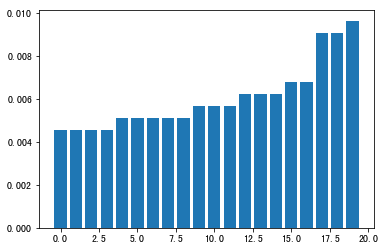

In [17]:
# plot
plt.bar(range(feature_nums), np.sort(clf.feature_importances_)[-feature_nums:])
plt.show()

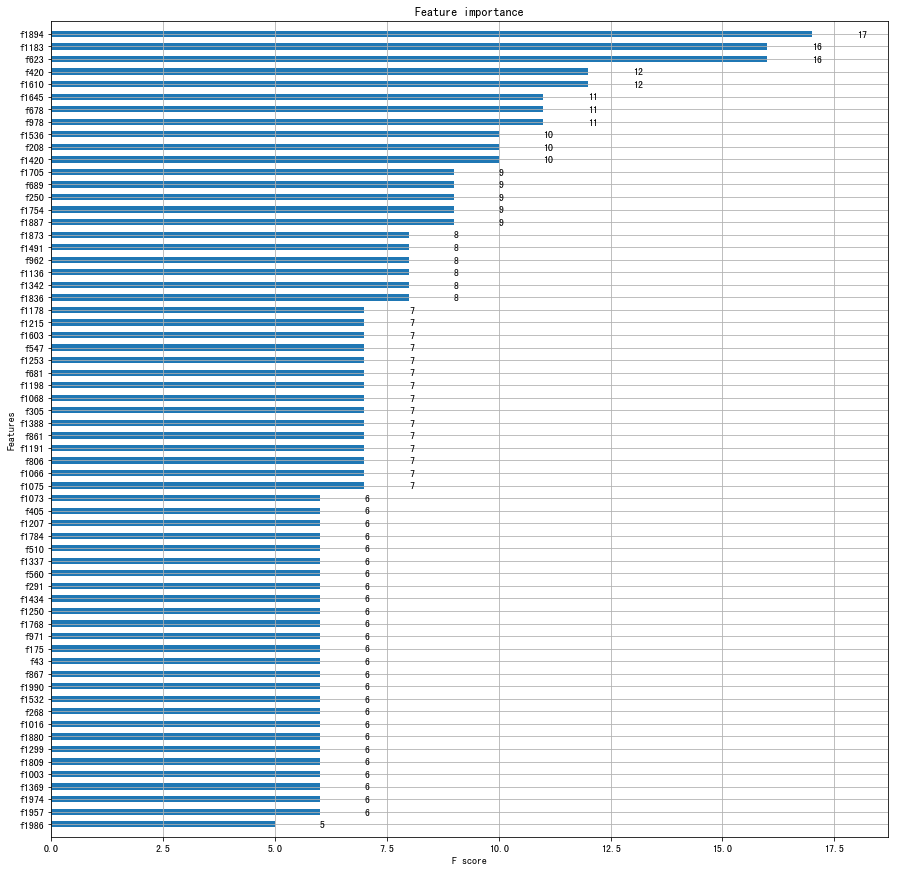

In [18]:
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(clf,
                height=0.5,
                ax=ax,
                max_num_features=64)
plt.show()

# Step 4. Calculate Performance Metrics

<img src="perf_metrics.png">

In [19]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Train AUC:0.804
Valid AUC:0.667
Train accuracy:0.804
Valid accuracy:0.666
Train recall:0.783
Valid recall:0.668
Train precision:0.817
Valid precision:0.108
Train specificity:0.825
Valid specificity:0.666
Train prevalence:0.500
Valid prevalence:0.057


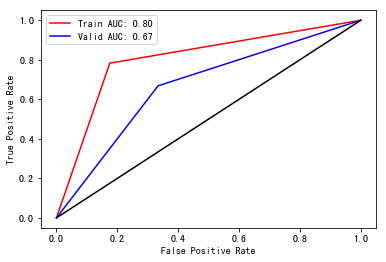

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Valid dataset: 


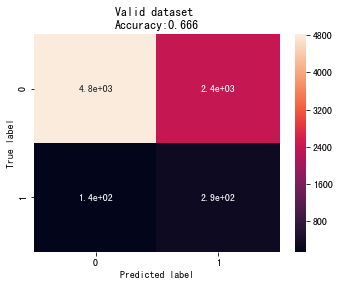

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Valid dataset: ")
cm = confusion_matrix(y_valid, y_valid_preds)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Valid dataset \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_valid, y_valid_preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Trainning dataset: 


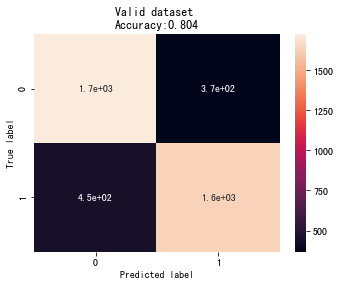

In [22]:
print("Trainning dataset: ")
cm = confusion_matrix(y_train, y_train_preds)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Valid dataset \nAccuracy:{0:.3f}'.format(metrics.accuracy_score(y_train, y_train_preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Tip C: plot a learning curve

Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [23]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

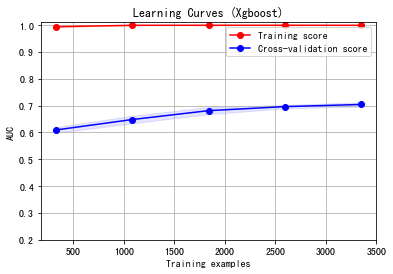

In [24]:
title = "Learning Curves (Xgboost)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
plot_learning_curve(clf, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()